In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt

def load_json(file_path):
    """
    Load a JSON file.
    """
    with open(file_path, "r") as file:
        data = json.load(file)
    return data

# Load the two original JSON datasets
json_path_1 = "Original_SAM/save/UnetPlusSamPredictions/find_centroids_gravity_center_recursive/results.json"
data1 = load_json(json_path_1)
json_path_2 = "Original_SAM/save/UnetPlusSamPredictions/find_centroids_gravity_center_adjusted/results.json"
data2 = load_json(json_path_2)
json_path_3 = "Original_SAM/save/UnetPlusSamPredictions/find_centroids_shrink_mask/results.json"
data3 = load_json(json_path_3)

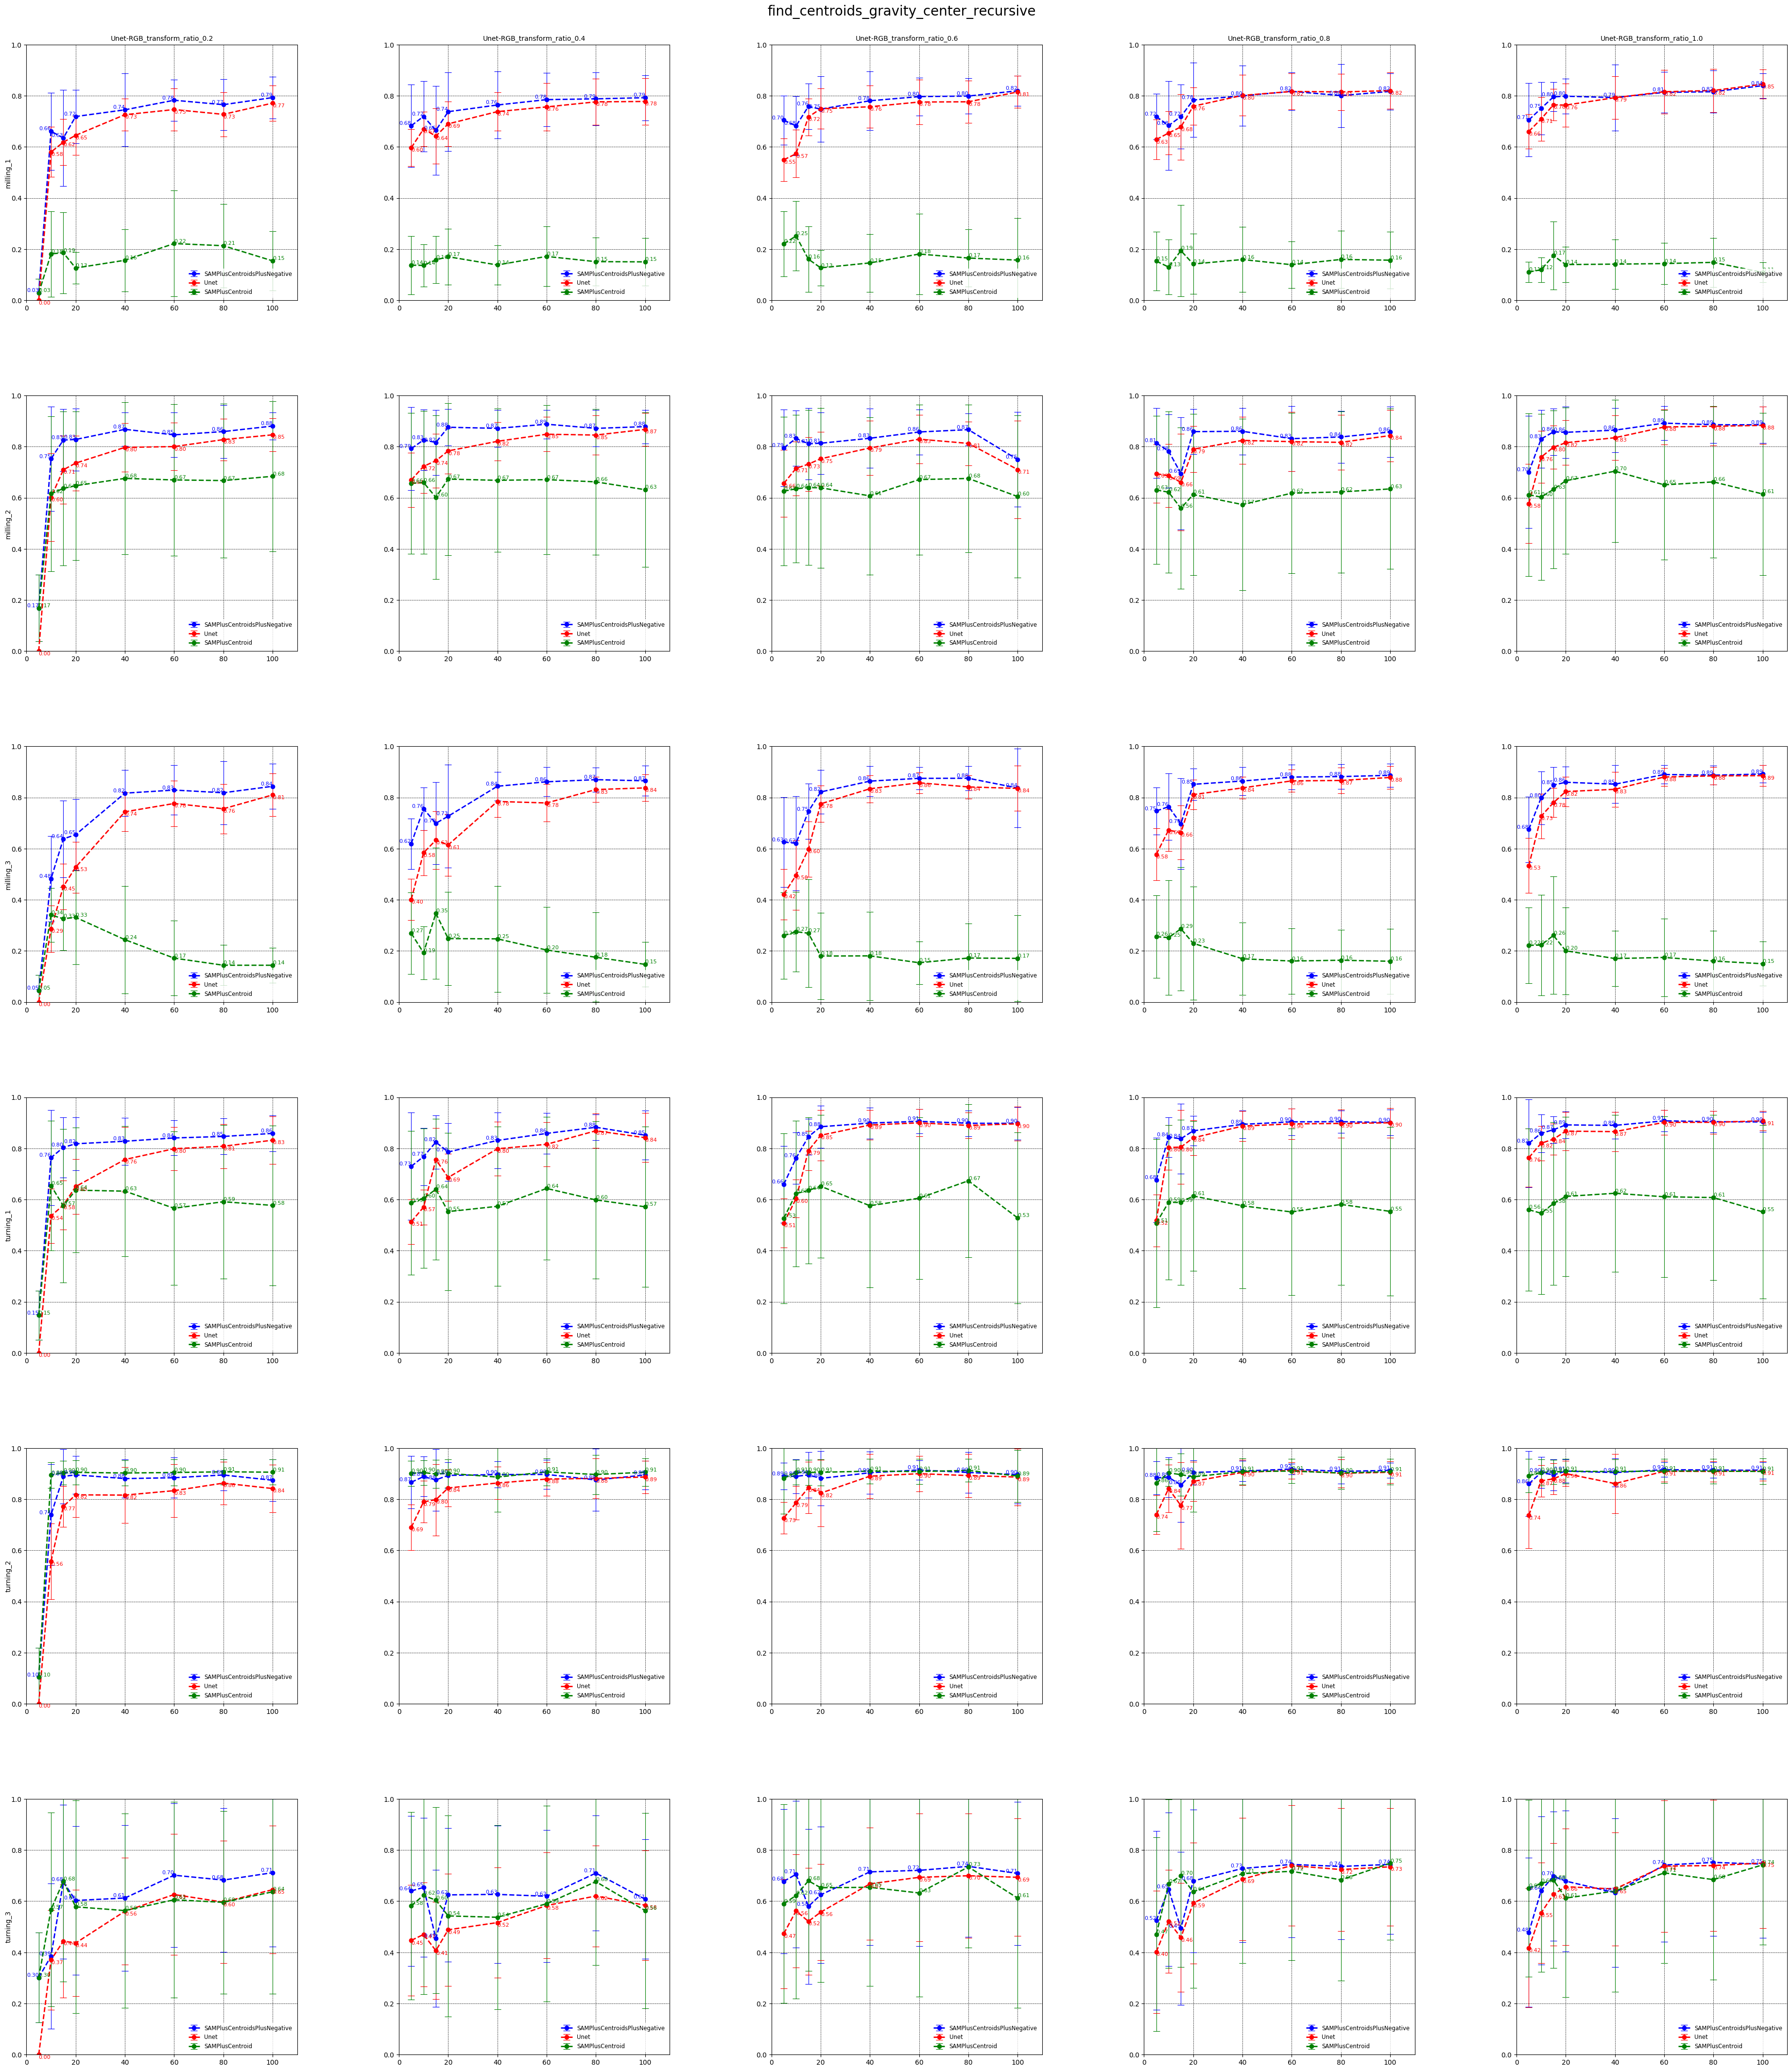

In [34]:

def modified_plot_data_on_ax(ax, project_name, transform_ratio, data, colors):
    # Extract the data for the given project_name and transform_ratio
    experiment_data_SAMPlusCentroidsPlusNegative = data['SAMPlusCentroidsPlusNegative'][transform_ratio]
    experiment_data_SAMPlusCentroid = data['SAMPlusCentroids'][transform_ratio]
    experiment_data_Unet = data['Unet'][transform_ratio]

    # Adjust axis colors
    ax.set_facecolor('white')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')

    # Extract the iterations (e.g., 5, 10, 15...) and convert them to integers for correct plotting
    iterations = sorted([int(iteration) for iteration in experiment_data_SAMPlusCentroidsPlusNegative.keys()])

    # Plot and annotate for SAMPlusCentroidsPlusNegative
    values_SAMPlusCentroidsPlusNegative = [experiment_data_SAMPlusCentroidsPlusNegative[str(iteration)].get(project_name, {}).get('avg', 0) 
                                           for iteration in iterations]
    errors_SAMPlusCentroidsPlusNegative = [experiment_data_SAMPlusCentroidsPlusNegative[str(iteration)].get(project_name, {}).get('std', 0) 
                                           for iteration in iterations]
    ax.errorbar(iterations, values_SAMPlusCentroidsPlusNegative, yerr=errors_SAMPlusCentroidsPlusNegative, 
                fmt='o-', color='blue', label='SAMPlusCentroidsPlusNegative', linewidth=2,
                elinewidth=0.8, ecolor='blue', capsize=5, capthick=0.8, linestyle='--')
    for k, val in enumerate(values_SAMPlusCentroidsPlusNegative):
        ax.text(iterations[k], val, f"{val:.2f}", color='blue', fontsize=8, ha='right', va='bottom')

    # Plot and annotate for Unet
    values_Unet = [experiment_data_Unet[str(iteration)].get(project_name, {}).get('avg', 0) 
                   for iteration in iterations]
    errors_Unet = [experiment_data_Unet[str(iteration)].get(project_name, {}).get('std', 0) 
                   for iteration in iterations]
    ax.errorbar(iterations, values_Unet, yerr=errors_Unet, 
                fmt='o-', color='red', label='Unet', linewidth=2,
                elinewidth=0.8, ecolor='red', capsize=5, capthick=0.8, linestyle='--')
    for k, val in enumerate(values_Unet):
        ax.text(iterations[k], val, f"{val:.2f}", color='red', fontsize=8, ha='left', va='top')

    # Plot and annotate for SAMPlusCentroid
    values_SAMPlusCentroid = [experiment_data_SAMPlusCentroid[str(iteration)].get(project_name, {}).get('avg', 0) 
                              for iteration in iterations]
    errors_SAMPlusCentroid = [experiment_data_SAMPlusCentroid[str(iteration)].get(project_name, {}).get('std', 0)
                                for iteration in iterations]
    ax.errorbar(iterations, values_SAMPlusCentroid, yerr=errors_SAMPlusCentroid,
                fmt='o-', color='green', label='SAMPlusCentroid', linewidth=2,
                elinewidth=0.8, ecolor='green', capsize=5, capthick=0.8, linestyle='--')
    for k, val in enumerate(values_SAMPlusCentroid):
        ax.text(iterations[k], val, f"{val:.2f}", color='green', fontsize=8, ha='left', va='bottom')

    # Set y-axis limit and grid
    ax.set_ylim(0, 1.0)
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, color='black')
    ax.set_xlim(0, max(iterations) + 10)

    # Add a legend to each subplot
    legend = ax.legend(loc='lower right', fontsize='small', frameon=True, facecolor='white', edgecolor='white')
    for test in legend.get_texts():
        test.set_color('black')

def plot_modified_complete_data(data):
    # Extract all data under 'find_centroids_gravity_center_recursive'
    key = next(iter(data))
    data_extracted = data[key]

    # Extract all unique project names and transform ratios
    project_names = set()
    transform_ratios = set()

    for category in data_extracted:
        for transform_ratio in data_extracted[category]:
            transform_ratios.add(transform_ratio)
            for iteration_data in data_extracted[category][transform_ratio].values():
                for project_name in iteration_data.keys():
                    project_names.add(project_name)

    # Convert project names to lowercase and sort
    sorted_project_names = sorted([name.lower() for name in project_names])
    sorted_transform_ratios = sorted(list(transform_ratios), key=lambda x: float(x.split("_")[-1]))

    # Adjust settings based on user's requirements and replot
    fig, axes = plt.subplots(len(sorted_project_names), len(sorted_transform_ratios), figsize=(40, 45))
    # 在整个图的上方显示key
    fig.suptitle(key, fontsize=20, color='black')
    fig.tight_layout(pad=12.0)
    fig.patch.set_facecolor('white')  # Set outer background to white

    for i, project_name in enumerate(sorted_project_names):
        for j, transform_ratio in enumerate(sorted_transform_ratios):
            original_project_name = next(name for name in project_names if name.lower() == project_name)
            modified_plot_data_on_ax(axes[i, j], original_project_name, transform_ratio, data_extracted, colors)
            if j == 0:
                axes[i, j].set_ylabel(project_name, fontsize='medium', rotation='vertical', va='center', color='black')
            
            # Add x-axis labels to the top-most subplots
            if i == 0:
                axes[i, j].set_title(transform_ratio, fontsize='medium', color='black')
    
    plt.show()

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Call the function with the loaded data
plot_modified_complete_data(data1)


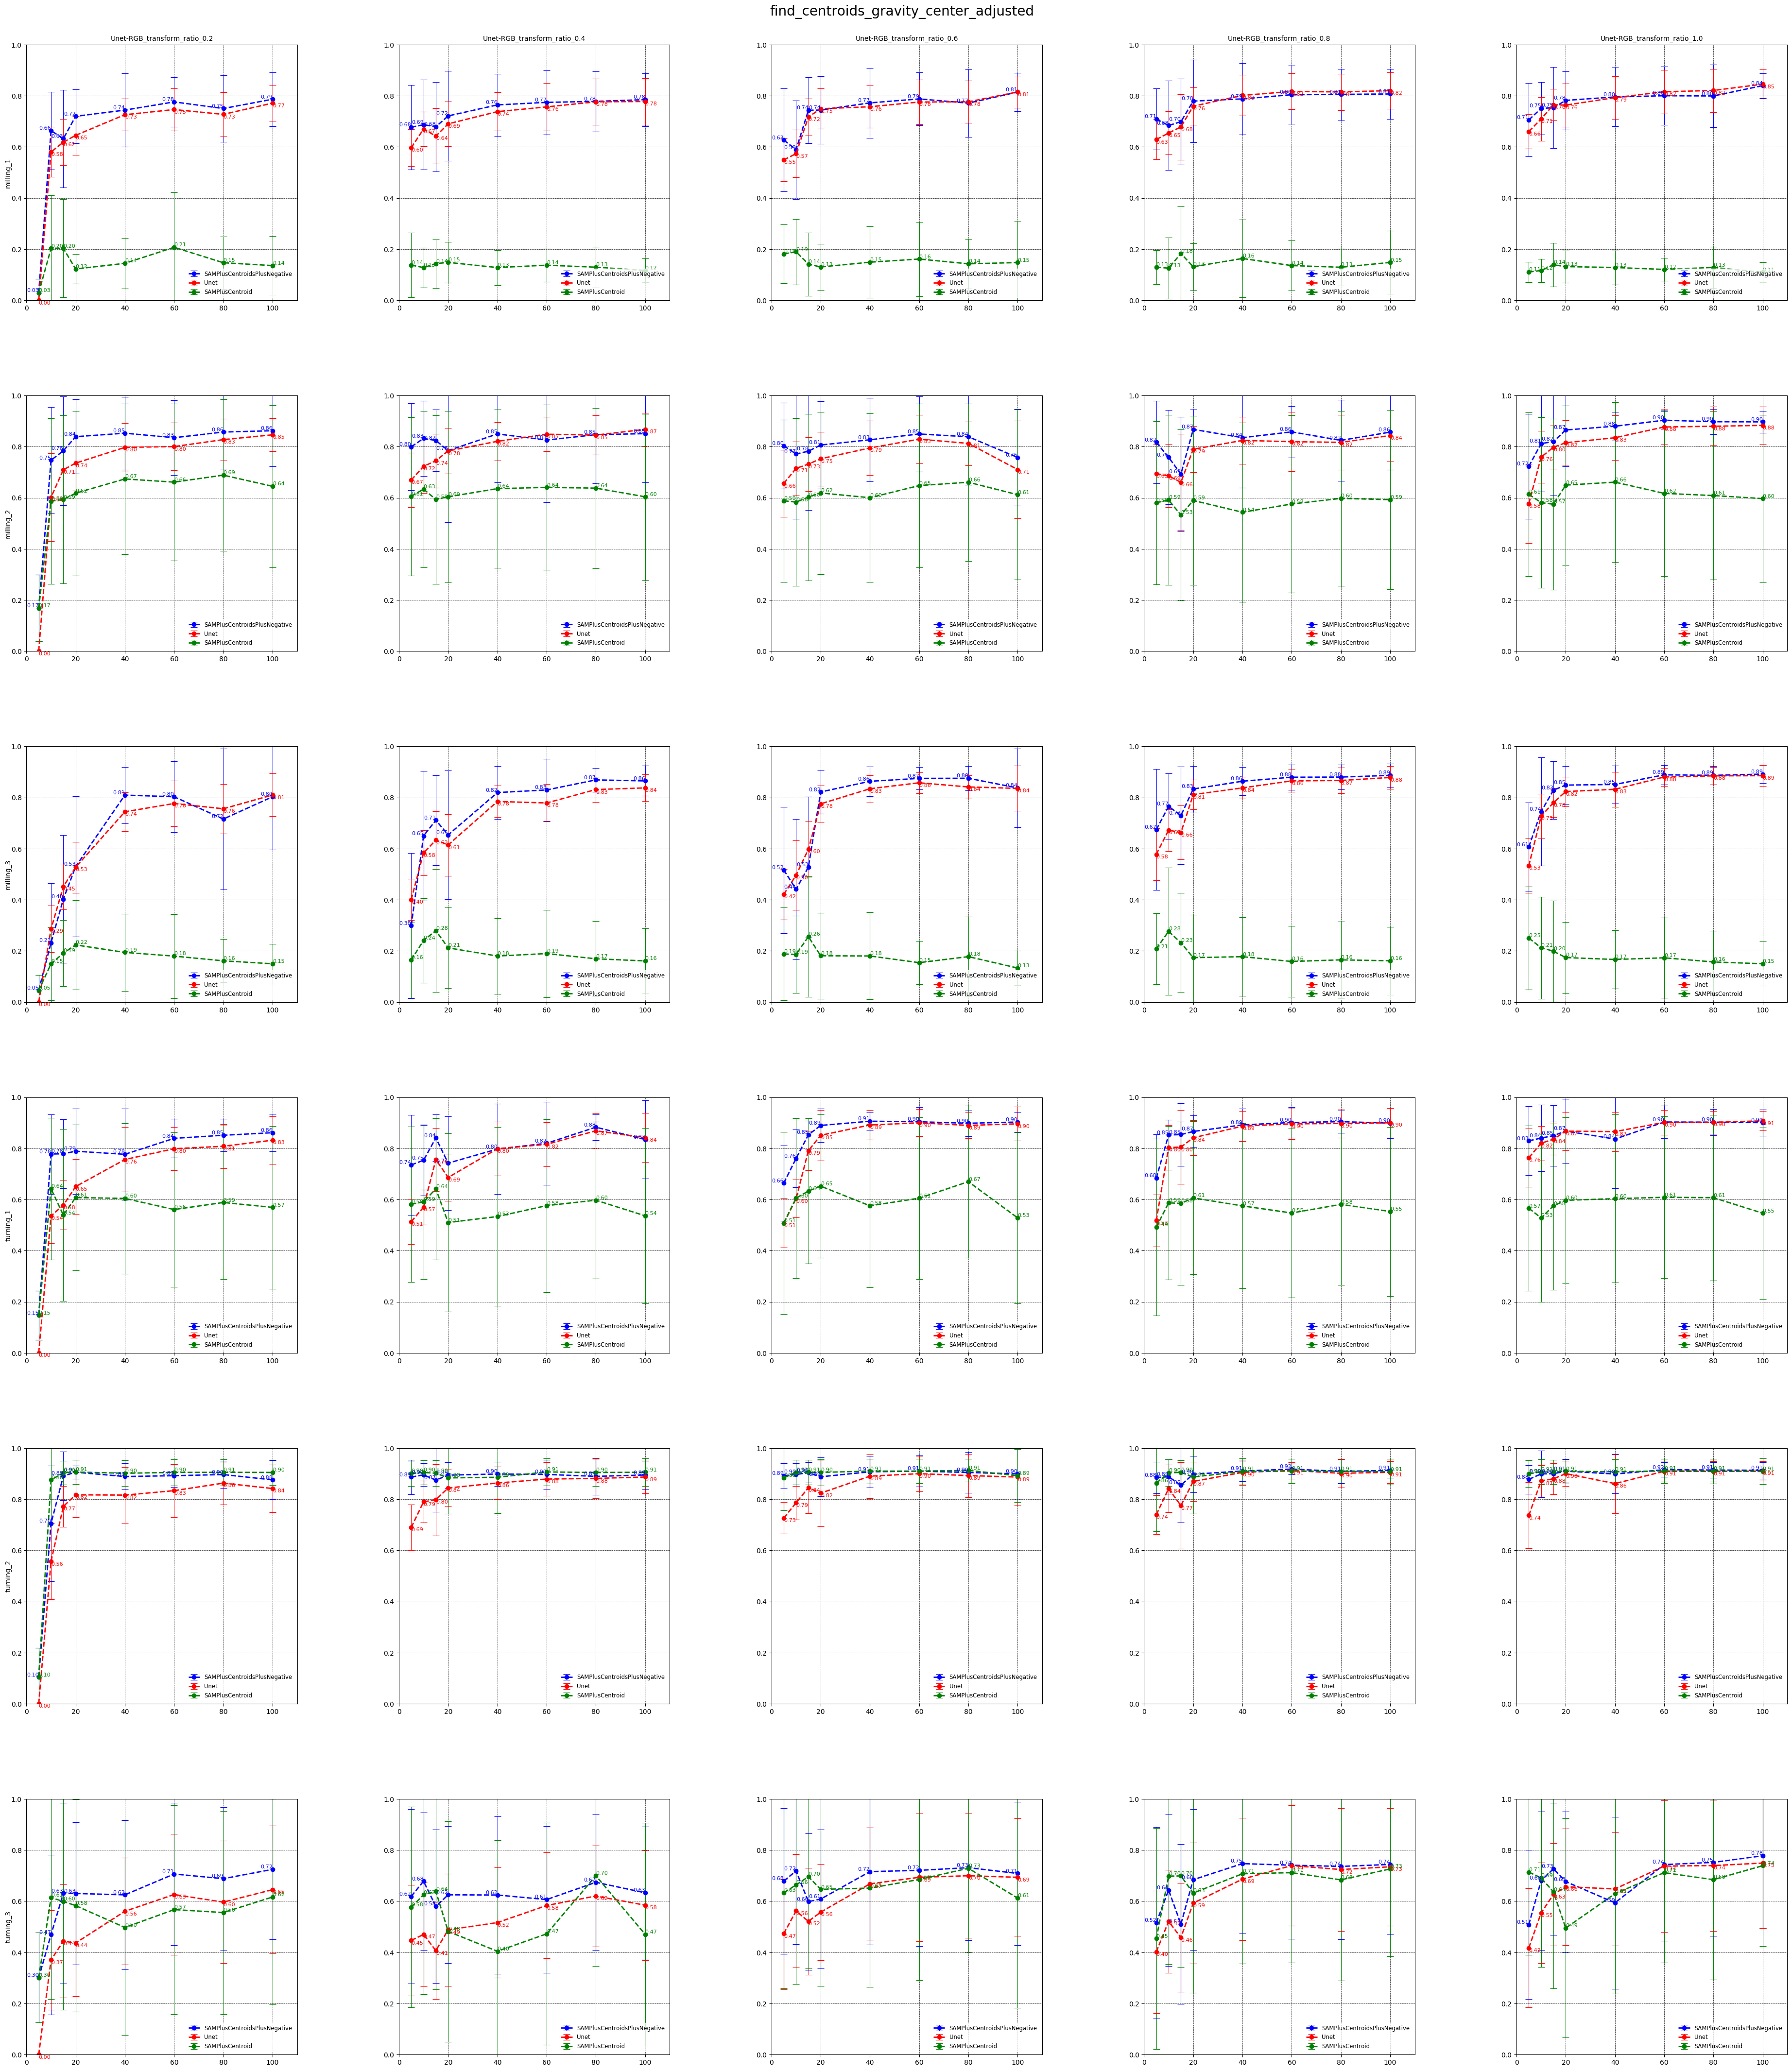

In [35]:
plot_modified_complete_data(data2)

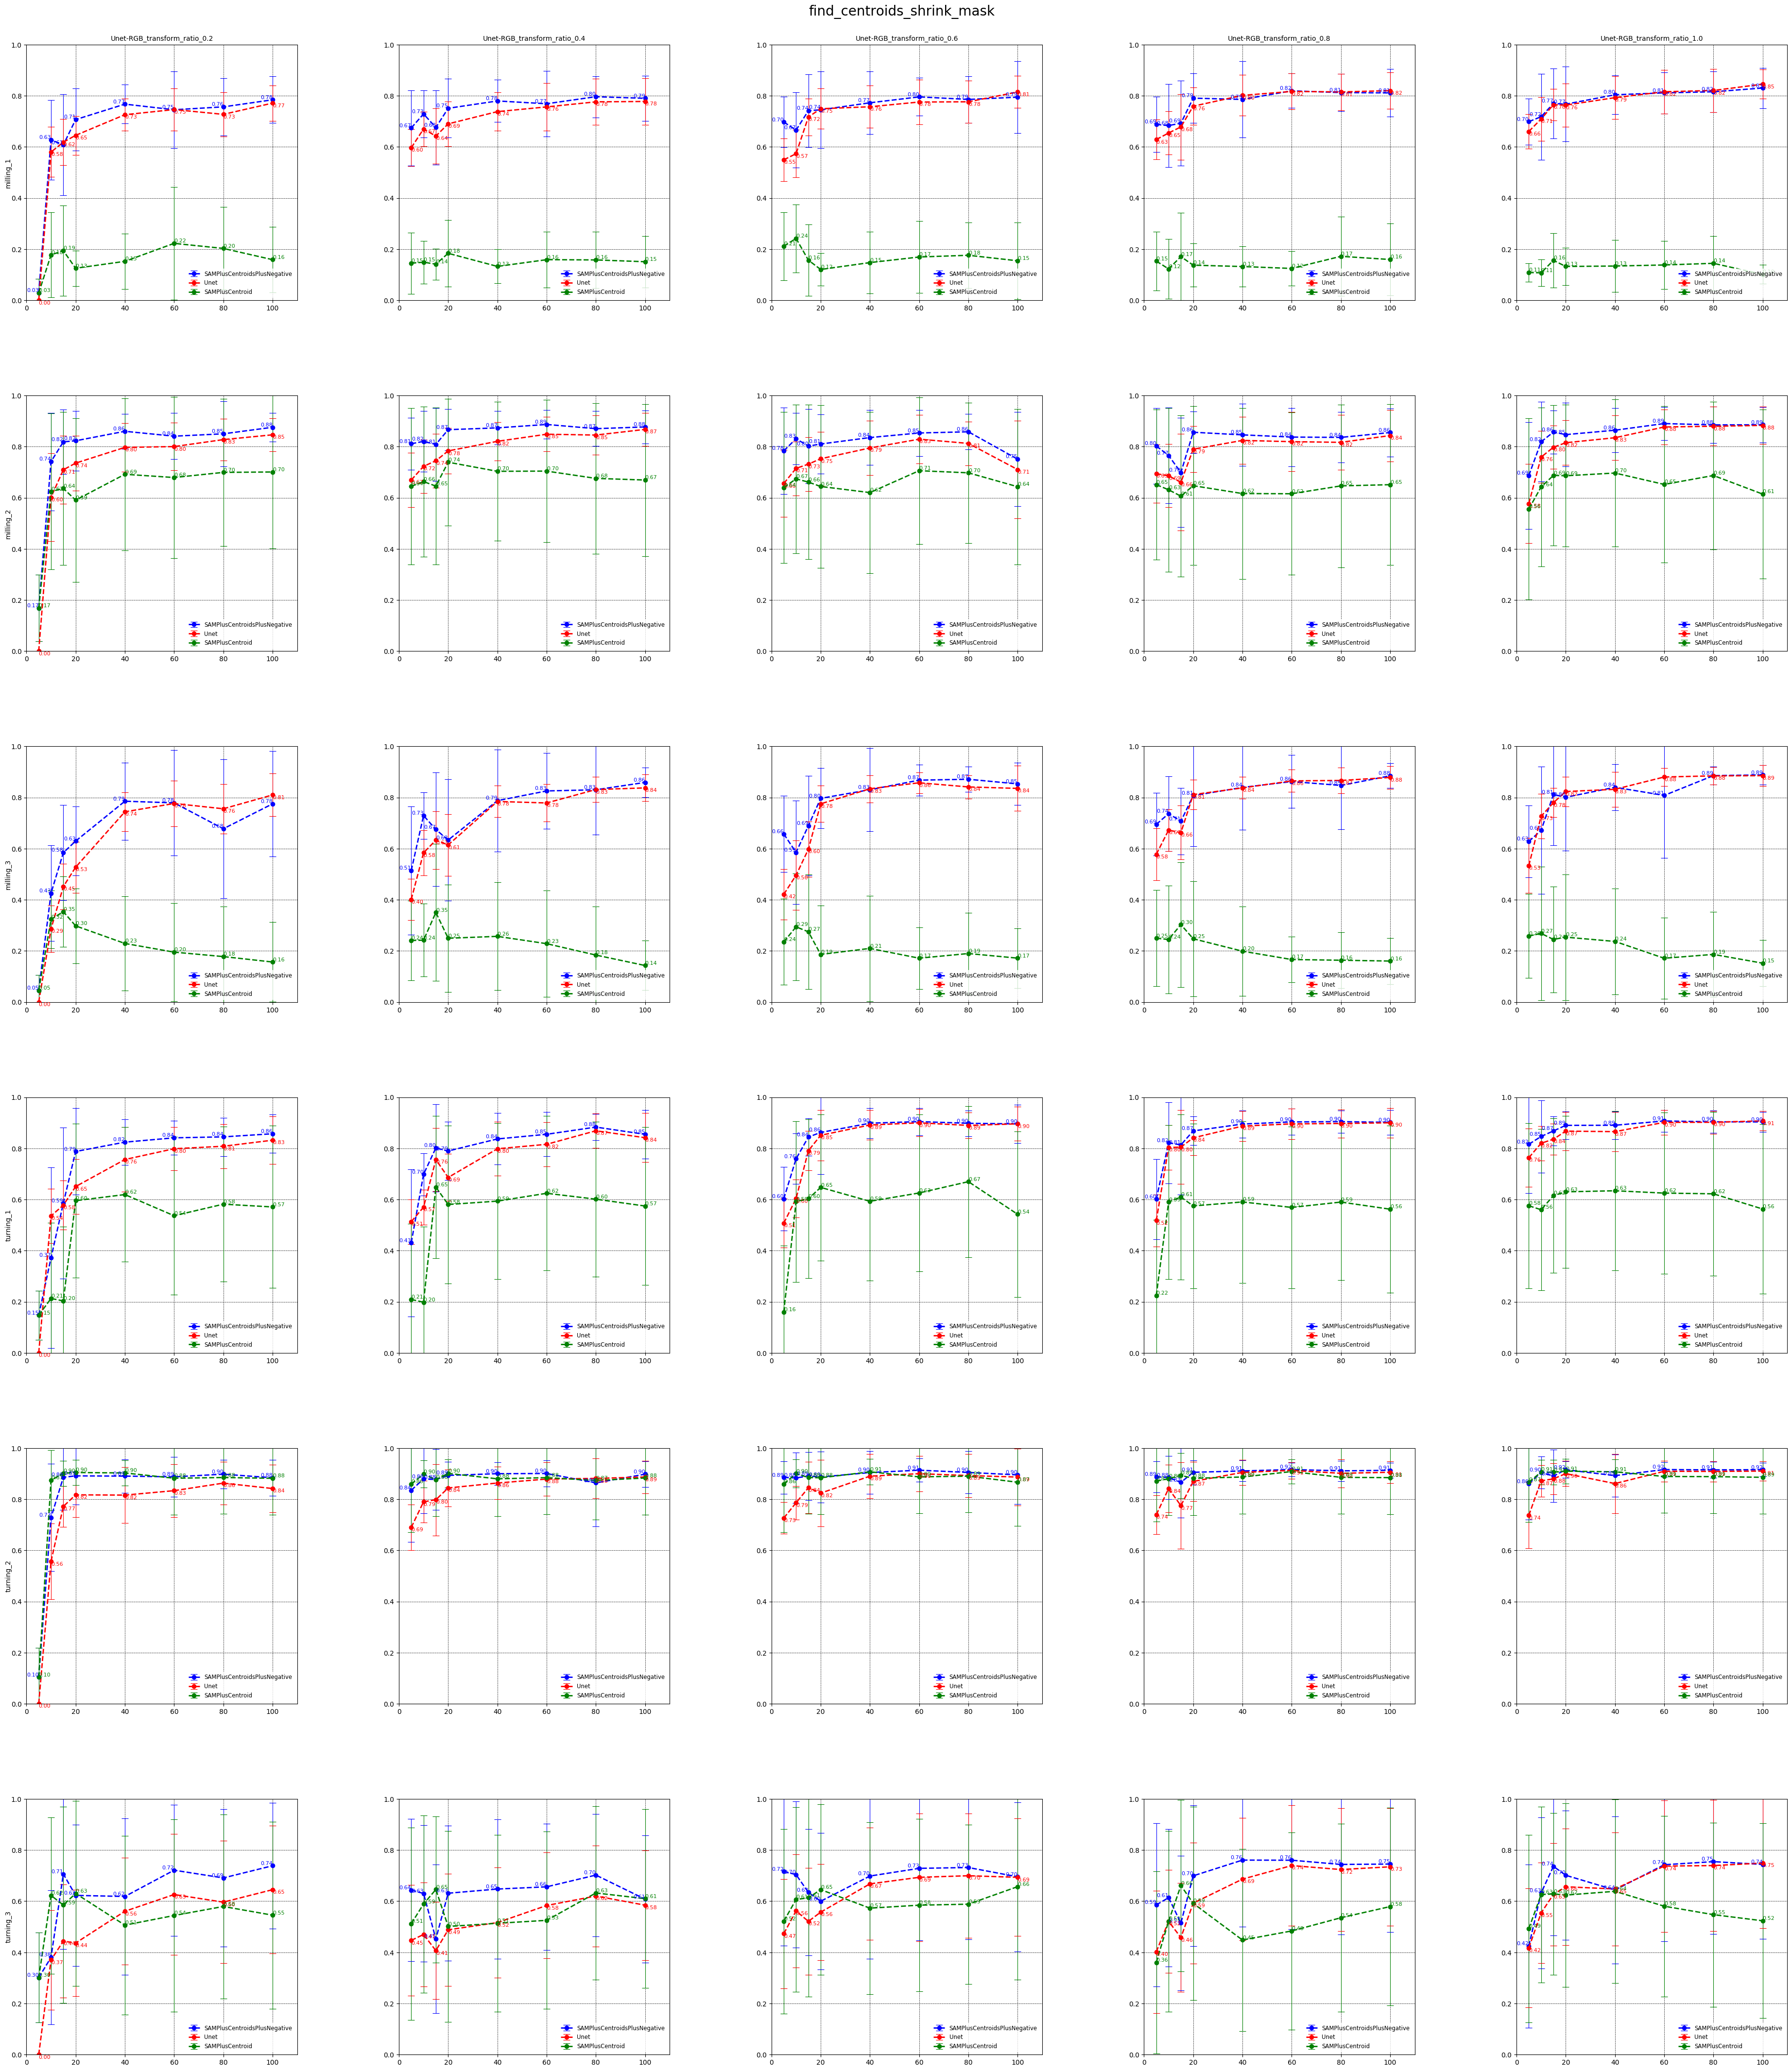

In [36]:
plot_modified_complete_data(data3)

In [40]:
# Load the content of each file into a dictionary
def load_json_content(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

# Load the data from each file
# Load the two original JSON datasets
json_path_1 = "./Original_SAM/save/UnetPlusSamPredictions/find_centroids_gravity_center_recursive/results.json"
data1 = load_json(json_path_1)
json_path_2 = "Original_SAM/save/UnetPlusSamPredictions/find_centroids_gravity_center_adjusted/results.json"
data2 = load_json(json_path_2)
json_path_3 = "Original_SAM/save/UnetPlusSamPredictions/find_centroids_shrink_mask/results.json"
data3 = load_json(json_path_3)

# Merge the data based on the top-level keys
merged_data = {**data1, **data2, **data3}
merged_data.keys()  # Display the top-level keys of the merged data

# Save the merged data to a new JSON file
output_file_path = "./Original_SAM/save/UnetPlusSamPredictions/merged_results.json"
with open(output_file_path, 'w', encoding='utf-8') as f:
    json.dump(merged_data, f, ensure_ascii=False, indent=4)



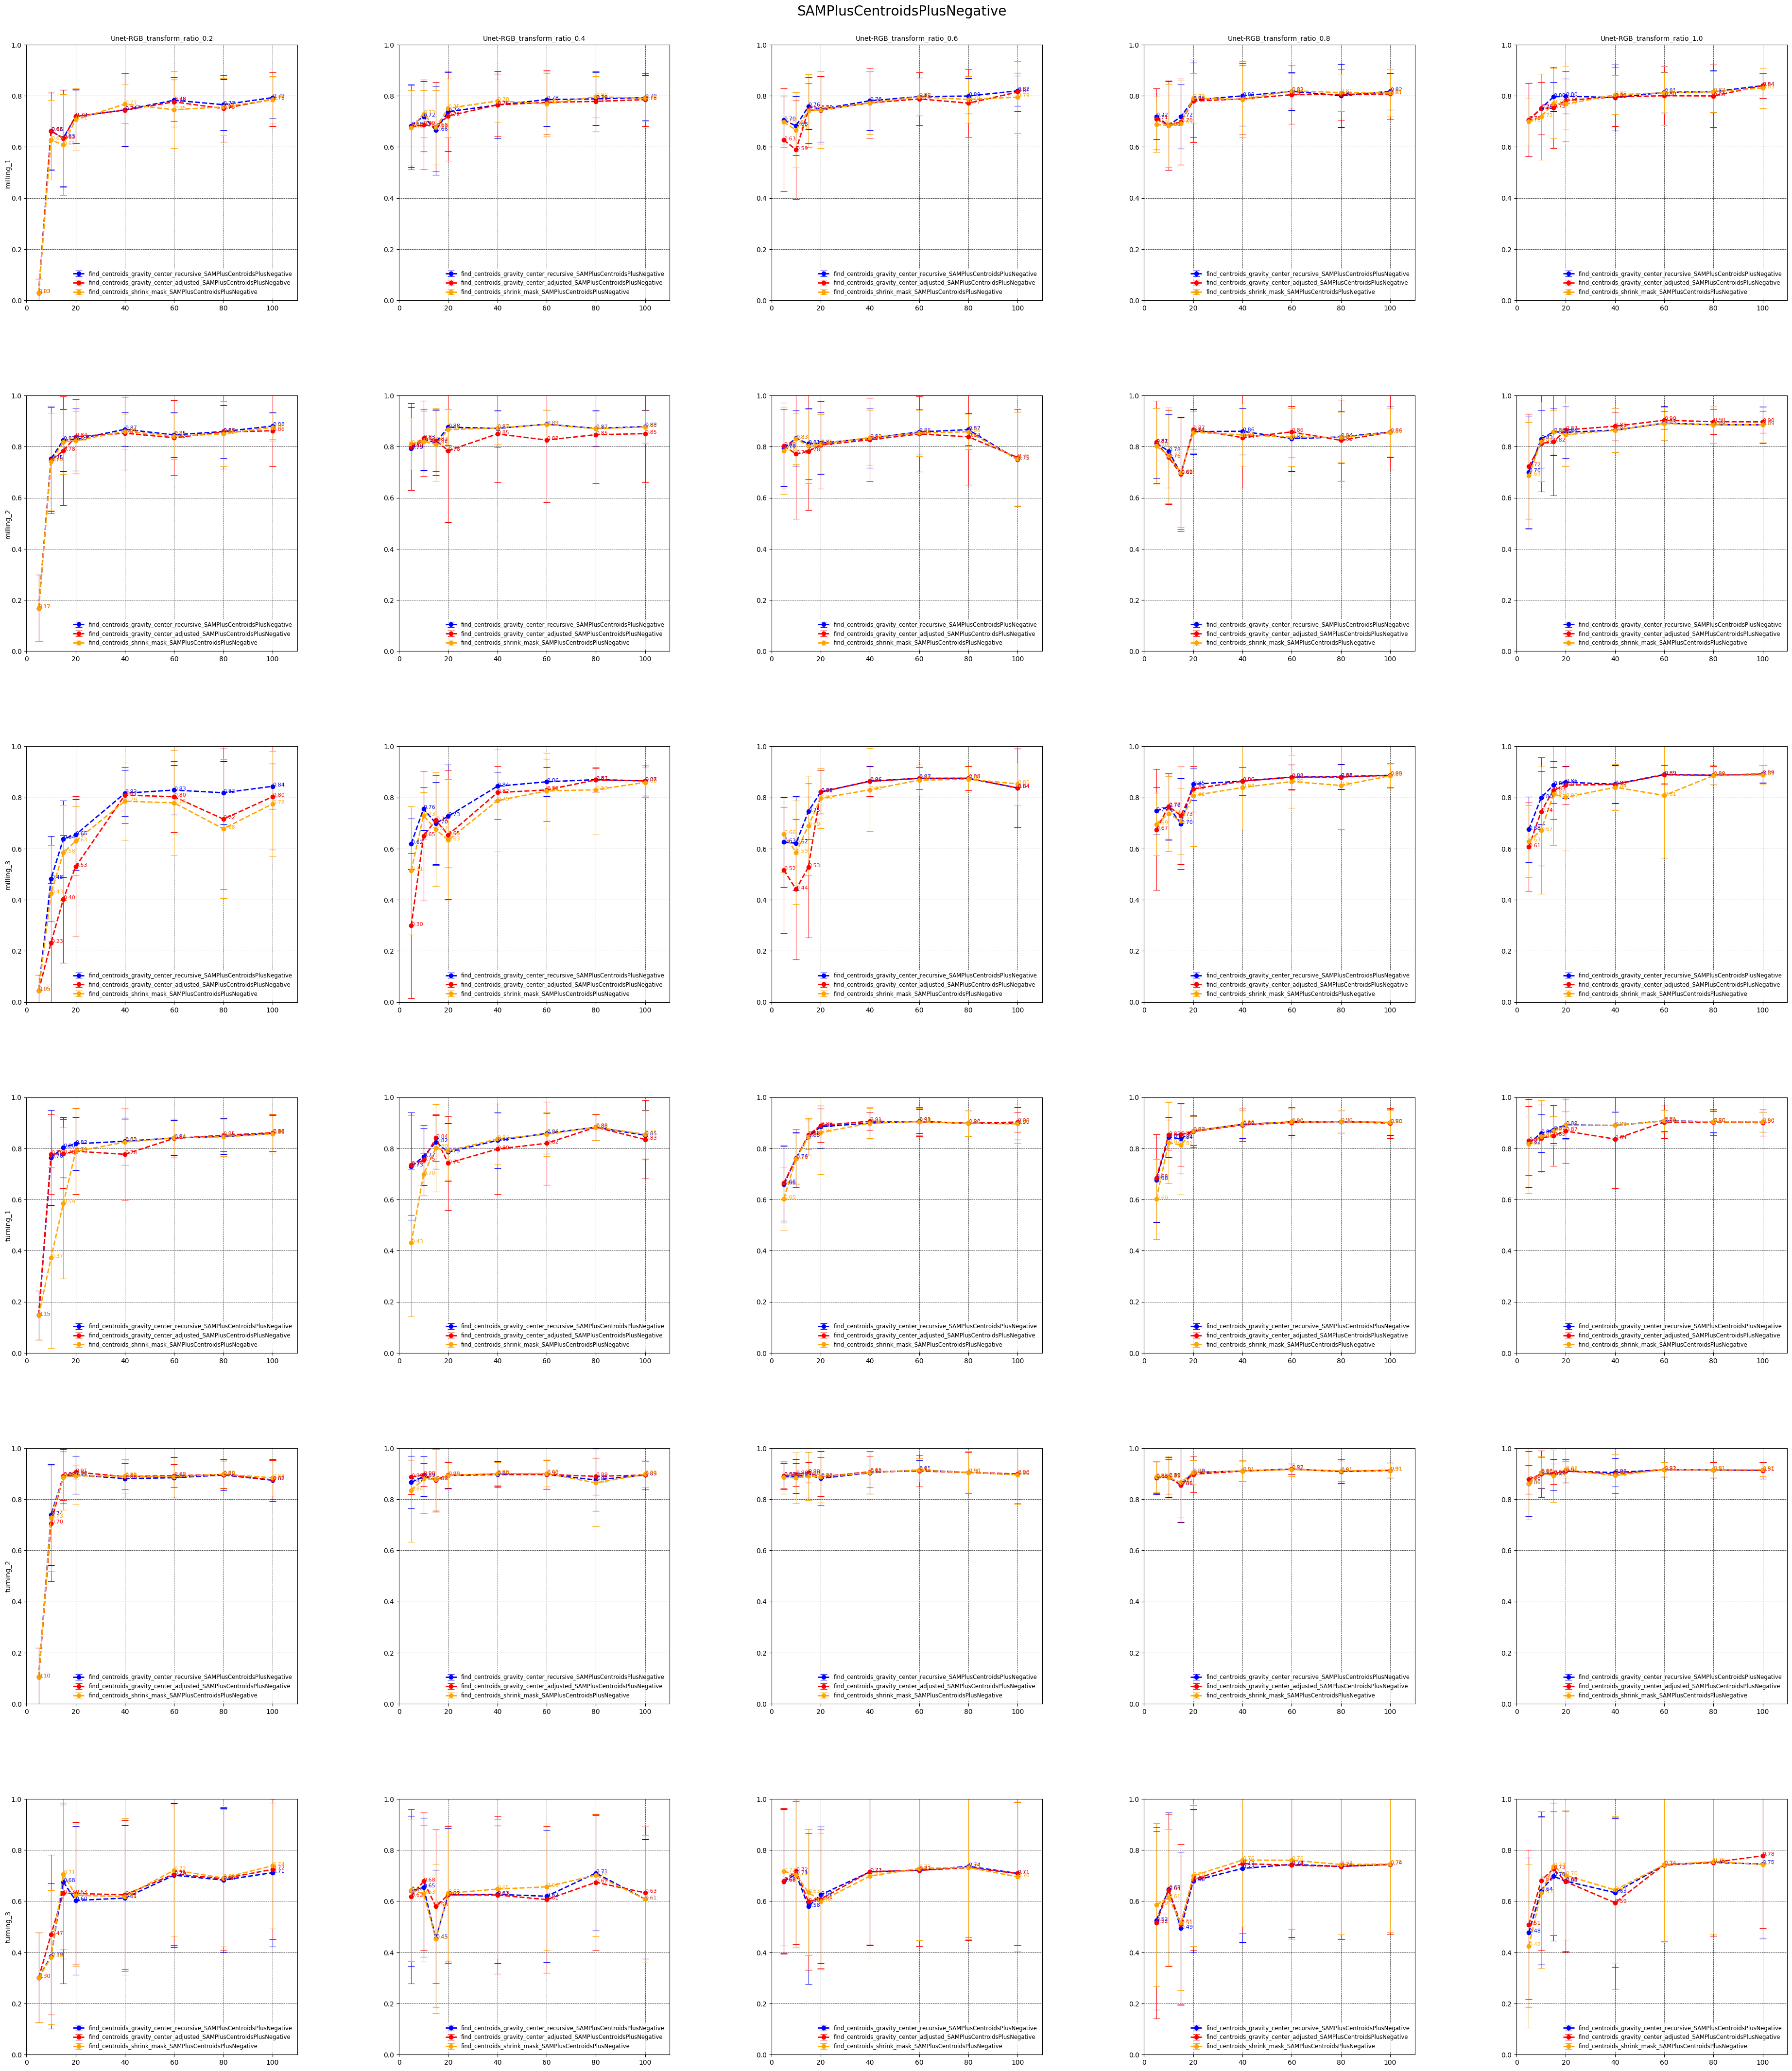

In [44]:
import matplotlib.pyplot as plt

def modified_plot_data_on_ax(ax, project_name, transform_ratio, data, top_keys, colors):
    # Adjust axis colors
    ax.set_facecolor('white')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')

    # Extract the iterations (e.g., 5, 10, 15...) from one of the data sets and convert them to integers
    sample_data_set = next(iter(data.values()))['Unet'][transform_ratio]
    iterations = sorted([int(iteration) for iteration in sample_data_set.keys()])
    
    for top_key_index, top_key in enumerate(top_keys):
        for model_name, color in zip(['SAMPlusCentroidsPlusNegative'], colors[top_key_index*2:top_key_index*2+2]):
            experiment_data = data[top_key][model_name][transform_ratio]
            
            # Extract values and errors
            values = [experiment_data[str(iteration)].get(project_name, {}).get('avg', 0) 
                      for iteration in iterations]
            errors = [experiment_data[str(iteration)].get(project_name, {}).get('std', 0) 
                      for iteration in iterations]
            
            ax.errorbar(iterations, values, yerr=errors, 
                        fmt='o-', color=color, label=f"{top_key}_{model_name}", linewidth=2,
                        elinewidth=0.8, ecolor=color, capsize=5, capthick=0.8, linestyle='--')
            
            # Annotate the values
            for k, val in enumerate(values):
                ax.text(iterations[k], val, f"{val:.2f}", color=color, fontsize=8)

    # Set y-axis limit and grid
    ax.set_ylim(0, 1.0)
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, color='black')
    ax.set_xlim(0, max(iterations) + 10)

    # Add a legend to each subplot
    legend = ax.legend(loc='lower right', fontsize='small', frameon=True, facecolor='white', edgecolor='white')
    for test in legend.get_texts():
        test.set_color('black')

def plot_complete_merged_data(data):
    # Extract all unique project names and transform ratios
    project_names = set()
    transform_ratios = set()
    sample_data_set = next(iter(data.values()))

    for category in sample_data_set:
        for transform_ratio in sample_data_set[category]:
            transform_ratios.add(transform_ratio)
            for iteration_data in sample_data_set[category][transform_ratio].values():
                for project_name in iteration_data.keys():
                    project_names.add(project_name)

    # Convert project names to lowercase and sort
    sorted_project_names = sorted([name.lower() for name in project_names])
    sorted_transform_ratios = sorted(list(transform_ratios), key=lambda x: float(x.split("_")[-1]))
    # Define the top_level_keys based on the merged data
    top_level_keys = list(data.keys())

    fig, axes = plt.subplots(len(sorted_project_names), len(sorted_transform_ratios), figsize=(40, 45))
    fig.suptitle("SAMPlusCentroidsPlusNegative", fontsize=20, color='black')
    fig.tight_layout(pad=12.0)
    fig.patch.set_facecolor('white')  # Set outer background to white

    for i, project_name in enumerate(sorted_project_names):
        for j, transform_ratio in enumerate(sorted_transform_ratios):
            original_project_name = next(name for name in project_names if name.lower() == project_name)
            modified_plot_data_on_ax(axes[i, j], original_project_name, transform_ratio, data, top_level_keys, colors)
            
            if j == 0:
                axes[i, j].set_ylabel(project_name, fontsize='medium', rotation='vertical', va='center', color='black')
            
            # Add x-axis labels to the top-most subplots
            if i == 0:
                axes[i, j].set_title(transform_ratio, fontsize='medium', color='black')
    
    plt.show()

# Call the function with the merged data
plot_complete_merged_data(merged_data)


In [46]:
import pandas as pd

# Create a function to flatten the data structure and convert it to a DataFrame for each top_key, model, and ratio combination
def flatten_data_for_each_combination(data, top_key, model, ratio):
    rows = []
    transform_data = data[top_key][model][ratio]
    for epoch, epoch_data in transform_data.items():
        for project_name, project_metrics in epoch_data.items():
            avg_value = project_metrics.get('avg', None)
            rows.append([project_name, epoch, avg_value])

    # Convert the flattened data to a DataFrame
    df = pd.DataFrame(rows, columns=['Project_Name', 'Epoch', 'Avg'])
    
    # Pivot the DataFrame to get the desired format
    df_pivot = df.pivot(index='Project_Name', columns='Epoch', values='Avg').reset_index()

    return df_pivot

# Shorten the top_key names for sheet names
short_top_key_names = {
    'find_centroids_gravity_center_recursive': 'gcr',
    'find_centroids_gravity_center_adjusted': 'gca',
    'find_centroids_shrink_mask': 'sm'
}

# Generate shortened sheet names based on top_key, model, and ratio
# Adjust the function to generate shortened sheet names based on your requirements
def generate_short_sheet_name(top_key, model, ratio):
    short_top_key = short_top_key_names[top_key]
    model_mapping = {
        'Unet': 'unet',
        'SAMPlusCentroids': 'sam_c',
        'SAMPlusCentroidsPlusNegative': 'sam_c_n'
    }
    short_model = model_mapping[model]
    short_ratio = ratio.split("_")[-1]
    return f"{short_top_key}_{short_model}_{short_ratio}"

top_level_keys = list(merged_data.keys())
# Flatten the data and store in a dictionary based on top_key, model, and ratio combination
dfs_adjusted = {(top_key, model, ratio): flatten_data_for_each_combination(merged_data, top_key, model, ratio)
                for top_key in top_level_keys
                for model in ['Unet', 'SAMPlusCentroids', 'SAMPlusCentroidsPlusNegative']
                for ratio in merged_data[top_key][model].keys()}

# Sort the ratios for ordering
sorted_ratios = sorted(list(merged_data[next(iter(top_level_keys))]['Unet'].keys()), key=lambda x: float(x.split("_")[-1]))

# Sort the dfs_adjusted based on the ratio for the sheet ordering
sorted_dfs_keys = sorted(dfs_adjusted.keys(), key=lambda x: float(x[2].split("_")[-1]))

# Save each DataFrame to a separate sheet in the same Excel file with shortened names and sorted order
output_file_path = "./Original_SAM/save/UnetPlusSamPredictions/merged_data.xlsx"
with pd.ExcelWriter(output_file_path) as writer:
    for keys in sorted_dfs_keys:
        top_key, model, ratio = keys
        sheet_name = generate_short_sheet_name(top_key, model, ratio)
        # Sort the DataFrame columns based on the ratio as well
        columns_order = ['Project_Name'] + sorted([col for col in dfs_adjusted[keys].columns if col != 'Project_Name'], key=lambda x: int(x))
        dfs_adjusted[keys][columns_order].to_excel(writer, sheet_name=sheet_name, index=False)
